<a href="https://colab.research.google.com/github/MarkPesano/Phys-250/blob/main/Mark_Pesano_Homework03_Euler_Projectiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: The Euler Method for Integrating ODEs

*Written by Rose Finn*

*Adapted from Giordano and Nakanishi, [Computational Physics](https://www.physics.purdue.edu/~hisao/book/), Chapter 1-2*

# Overview

The goal of this lab is to use the **Euler method** to model system that are changing with time.  If we can describe how the system changes with time, then we can determine how the system changes by stepping it forward in time using  tiny intervals of time.  This is the basic idea behind the Euler method.

# Directions
* Complete the problems below.  
* It is ok to discuss the problems with others, but you must write the code yourself.
* **Be sure to cite any references that you use!!!**


In [ ]:
# import numpy and pyplot here
import numpy as np
from matplotlib import pyplot as plt


# Problem 1: 1D Projectile Motion with Euler Method

Let's try to apply the Euler to another physical problem, namely projectile motion.  We will start with a one-dimensional problem as a first step, and we will gradually make the calculations more complex by including air resistance.

We will first look at a problem where we drop a rock from a height of 30 m. Let the mass be 1 kg for simplicity.  To begin, we will use a time step of 0.2 seconds.

The Euler method is a bit more complex here than with radioactive decay, because we will need to keep track of both the position and velocity versus time.

```python
position[i] = position[i-1] + velocity[i-1]*dt
velocity[i] = velocity[i-1] + acceleration*dt
```

You should model your solution closely on the program we wrote to model the motion of a cyclist.    

In [ ]:
# insert your function to calculate tmax that you wrote in Lecture on Animation
def time_to_fall(y0,v0y,a):
    """ function to calculate time to reach y """
    t1 = (-v0y+np.sqrt(v0y**2-4*.5*a*(y0)))/a
    t2 = (-v0y-np.sqrt(v0y**2-4*.5*a*(y0)))/a
    if t1>0:
      return(t1)
    elif t2>0:
      return(t2)

In [ ]:
# write a function to calculate the acceleration
# note: without air resistance, this should just return the acceleration of gravity
# but we will adapt this below to also handle air resistance

def acceleration(t):
  """ acceleration function for object moving with const accel"""
  g = -9.8
  # we will edit this below to include air resistance
  a = g
  return a

In [ ]:
# write your initialize function to set up the position, velocity, and time arrays
# this should take in y0, v0y, tmax, and dt
def initialize(y0,v0y,tmax,dt):
  #Calculating the number of steps as nsteps
  nsteps = int(tmax/dt)
  #creating arrays for position, time, and velocity
  t = np.zeros(nsteps)
  pos = np.zeros(nsteps)
  vel = np.zeros(nsteps)
  #Initializing the values for when time=0
  pos[0] = y0
  vel[0] = v0y
  return (t, pos,vel)
# set up the t, pos, and vel arrays
# initialize the values for t=0 in the position and velocity arrays
# return t, pos, vel arrays




In [ ]:
# write your calculate function to compute the Euler solution for position and velocity
def calculate(t,vel,pos,dt,a):
  #Using the Euler method to compute the solution for poisition,time and velocity
  for i in range(1,len(vel)):
    vel[i] = vel[i-1] + acceleration(t)*dt
    pos[i] = pos[i-1] + vel[i-1]*dt
    t[i] = t[i-1]+dt

  return (t,pos,vel)



In [ ]:
# enter the parameters below
m = 1
g = -9.8
y0 = 30
v0y = 0
dt = .2

In [ ]:
# use your function to calculate tmax
# initial conditions of the ball
y0 = 30 # meters
yf = 0   # meters
v0y = 0   # m/s
g = -9.8 # m/s^2
#Code to call tmax
tf = time_to_fall(y0,v0y,a)
print("It takes {0} seconds to fall".format(tf))

# call your initialize function
tf_calc,pos_calc,vel_calc = initialize(y0,v0y,tf,dt)




# call your calculate function
#When calculation the function we call in what we return from the initialize function
tnoair,posnoair, velnoair = calculate(tf_calc,vel_calc,pos_calc,dt,a)
print(tnoair)
print(velnoair)
print(posnoair)


It takes 2.4743582965269675 seconds to fall
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2]
[  0.    -1.96  -3.92  -5.88  -7.84  -9.8  -11.76 -13.72 -15.68 -17.64
 -19.6  -21.56]
[30.    30.    29.608 28.824 27.648 26.08  24.12  21.768 19.024 15.888
 12.36   8.44 ]


Text(0, 0.5, 'Velocity(m/s)')

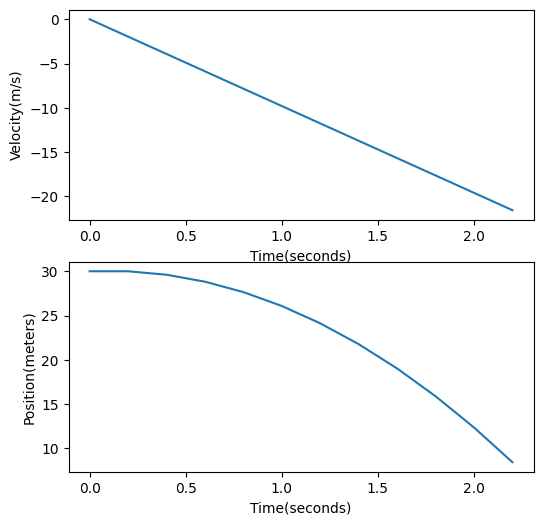

In [ ]:
# plot position vs time and velocity vs time
# put these in one plot using plt.subplot(2,1,1) and plt.subplot(2,1,2)
plt.figure(figsize = (6,6))
plt.subplot(2,1,2)
plt.plot(tnoair,posnoair)
plt.xlabel('Time(seconds)')
plt.ylabel('Position(meters)')
plt.subplot(2,1,1)
plt.plot(tnoair,velnoair)
plt.xlabel('Time(seconds)')
plt.ylabel('Velocity(m/s)')



# Problem 2: 1D Projectile Motion with Air Resistance

Adapt your code to include the effects of air resistance.  As we did with the cyclist, we will assume that air resistance scales with the square of velocity.  

You can assume that the coefficient of the air resistance term is $B_2 = 0.2$, and if you have extra time, you can see how your results depend on the value you choose for $B_2$.

Again, plot your velocity vs time and position vs time.  Compare your results to those from Problem 1, and comment on any differences.

It takes 2.4738431808148116 seconds to fall


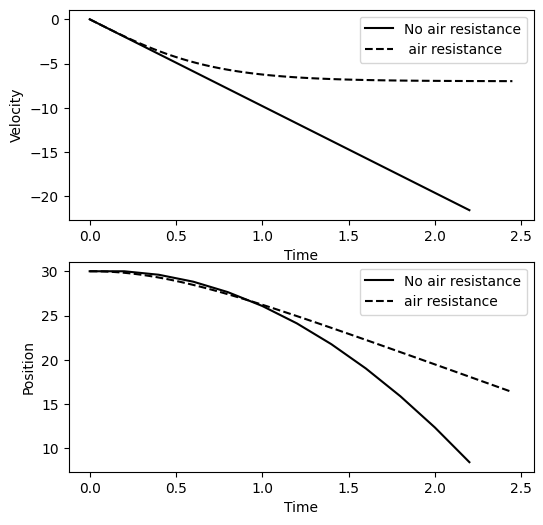

In [106]:
# New acceleration
B2 =.2
def acceleration_resist(g,vel_calc,B2,m):
  g = -9.8
  a1 = g+((B2/m)*vel_calc**2)
  return a1
a1 = acceleration_resist(vel_calc,B2,m,g)
tf2 = time_to_fall(y0,v0y,a1)
print("It takes {0} seconds to fall".format(tf2))
dt = tf2/100
def calculate_resist(t,vel,pos,dt,a1,B2):
  for i in range(1,len(vel)):
    vel[i] = vel[i-1] + acceleration_resist(g,vel[i-1],B2,m)*dt
    pos[i] = pos[i-1] + vel[i-1]*dt
    t[i] = t[i-1]+dt
  return (t,pos,vel)
tf_calc_air,pos_calc_air,vel_calc_air = initialize(y0,v0y,tf,dt)

tair,posair, velair = calculate_resist(tf_calc_air,vel_calc_air,pos_calc_air,dt,a1,B2)

plt.figure(figsize = (6,6))
plt.subplot(2,1,2)
plt.plot(tnoair,posnoair,'k-',label = 'No air resistance')
plt.plot(tair,posair,'k--',label =  'air resistance')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.subplot(2,1,1)
plt.plot(tnoair,velnoair,'k-',label = 'No air resistance')
plt.plot(tair,velair,'k--',label = ' air resistance')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
